In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
import dendrotweaks as dd
dd.__version__

'0.4.0'

In [3]:
dd.apply_dark_theme()

In [4]:
path_to_model = os.getcwd()
print(f'Path to model: {path_to_model}')
path_to_data = os.path.dirname(path_to_model)
print(f'Path to data: {path_to_data}')

Path to model: /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Test
Path to data: /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples


In [5]:
model = dd.Model(path_to_model, simulator_name='Jaxley')

In [6]:
model.load_morphology(file_name='point', soma_notation='3PS')

Sorted PointTree(root=Point(idx=0), num_nodes=3).
Extended 0 nodes.


In [8]:
model._cell.nodes

,local_cell_index,local_branch_index,local_comp_index,length,radius,axial_resistivity,capacitance,v,global_cell_index,global_branch_index,global_comp_index,controlled_by_param
0,0,0,0,10.0,1.0,5000.0,1.0,-70.0,0,0,0,0


In [10]:
model.sec_tree.topology()

parent |   idx
---------------
    -1 |   •0


In [11]:
# model.sec_tree[4]._ref

In [11]:
model.add_default_mechanisms()

In [12]:
model.mechanisms

{'Leak': <dendrotweaks.biophys.jaxley_mechanisms.JaxleyLeakChannel at 0x7553d8dda3d0>}

In [13]:
model.domains

{'soma': <Domain(soma, 1 sections)>}

In [14]:
model.domains_to_mechs

{'soma': set()}

In [15]:
for domain_name in model.domains:
    model.insert_mechanism('Leak', domain_name=domain_name)

In [15]:
# model.set_param('gbar_Leak', value=0.0001)
model.set_param('Ra', value=100)
model.set_param('cm', value=1)
# model.set_param('gbar_Leak',
#     distr_type='linear', slope=0.000_01, intercept=0.005)

In [16]:
model.df_params

,Mechanism,Parameter,Group,Distribution,Distribution params
0,Independent,cm,all,constant,{'value': 1}
1,Independent,Ra,all,constant,{'value': 100}


In [16]:
# model._cell.nodes

In [17]:
# model.sec_tree[5]._ref.nodes

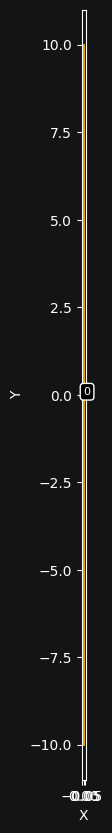

In [17]:
model.sec_tree.plot(annotate=True)

In [18]:
model.add_iclamp(sec=model.sec_tree[0], loc=0.5, amp=0.1, dur=800, delay=100)

IClamp added to sec JaxleySection(idx=0) at loc 0.5.


In [19]:
model.simulator.add_recording(sec=model.sec_tree[0], loc=0.5)

Added 1 recordings. See `.recordings` for details.


In [21]:
# model.simulator.add_recording(sec=model.sec_tree[-1], loc=0.5)

In [22]:
model._cell[0].set('axial_resistivity', 100)

In [23]:
model.sec_tree[0]._ref.nodes

,local_cell_index,local_branch_index,local_comp_index,length,radius,axial_resistivity,capacitance,v,global_cell_index,global_branch_index,global_comp_index,controlled_by_param
0,0,0,0,10.0,1.0,100.0,1.0,-70.0,0,0,0,0


In [24]:
model.simulator.run(duration=1000)

Added 1 external_states. See `.externals` for details.


Text(0.5, 1.0, 'Jaxley')

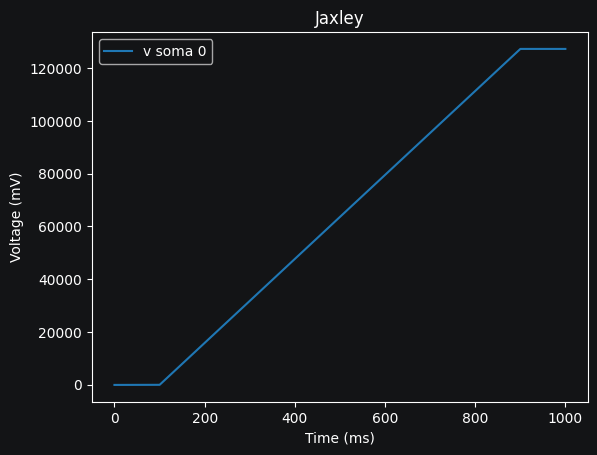

In [25]:
model.simulator.plot_voltage()
plt.title(model.simulator_name)

Text(0.5, 1.0, 'NEURON')

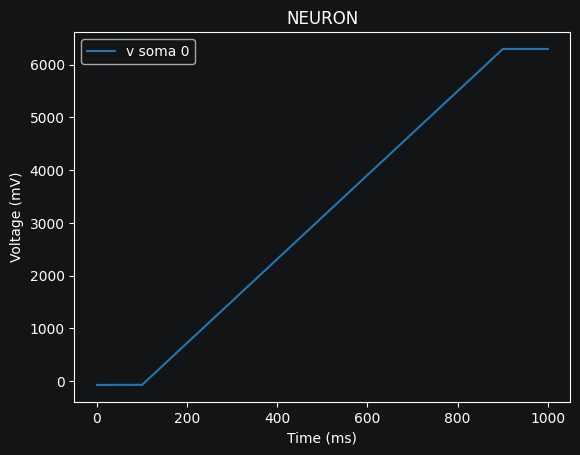

In [21]:
model.simulator.plot_voltage()
plt.title(model.simulator_name)